<a href="https://colab.research.google.com/github/zhadyralimbay/ECG-signal-analysis/blob/main/%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82_%D0%BB%D0%BE%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D1%8C%D0%B8_%D0%BF%D0%BE%D1%81%D0%BB_%22%D0%9F%D0%9A%D0%90_%D0%BD%D0%B0%D1%88%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B4%D0%BB%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D1%8C%D0%B8_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

In [ ]:

# Load ECG data from file
file_path = '/content/drive/MyDrive/ECG Data/12345678р.txt'
ecg_data = np.loadtxt(file_path)

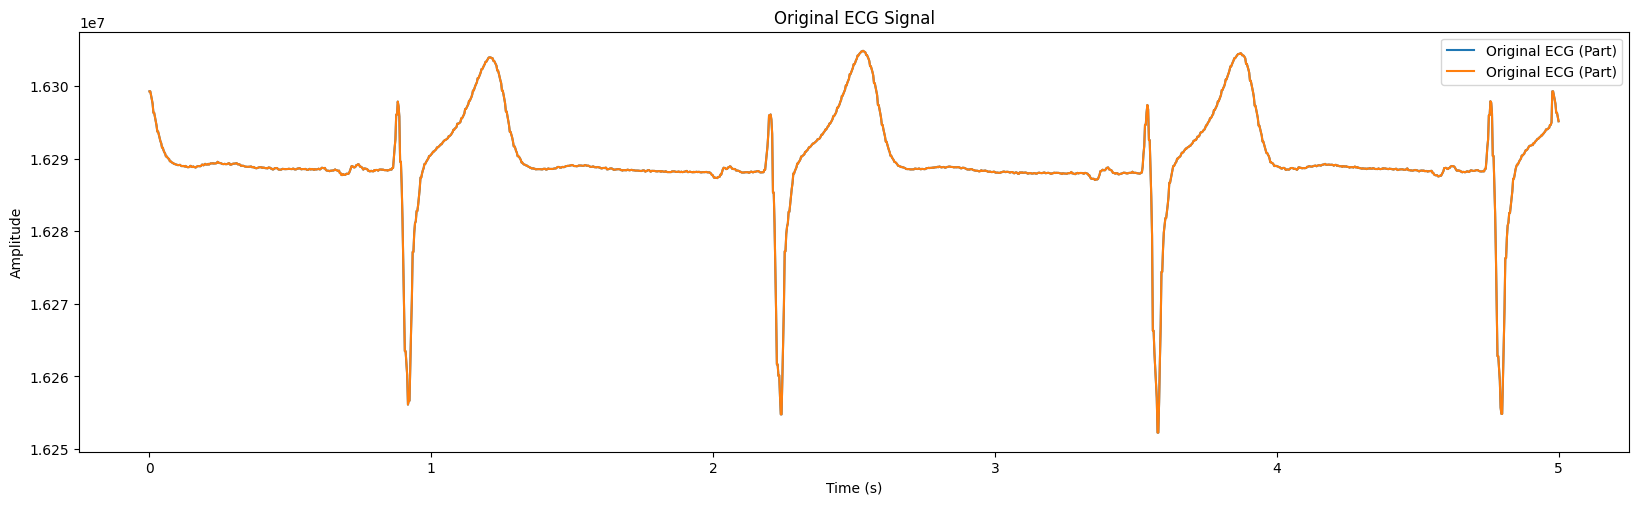

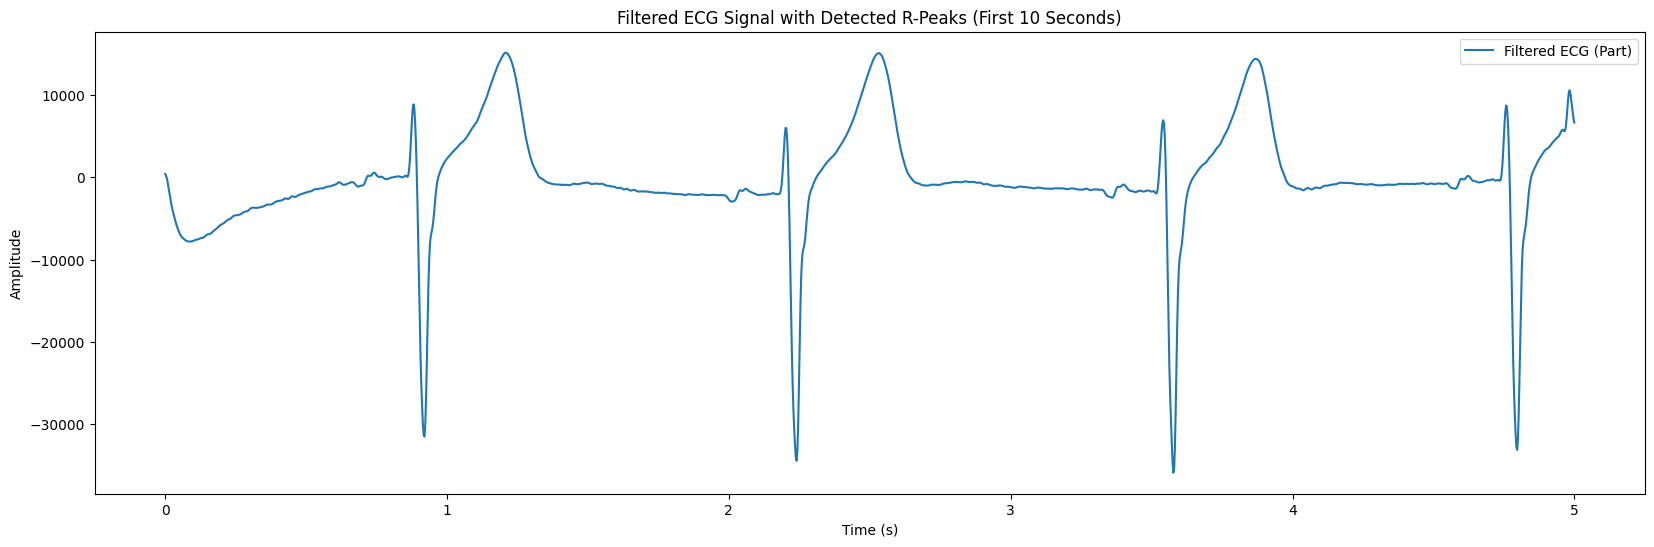

In [ ]:
# Определение временного интервала для визуализации
start_time = 0  # Начало интервала в секундах
end_time = 5  # Конец интервала в секундах

# Определение индексов для этого временного интервала
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Устанавливаем параметры для фильтрации и определения пиков
fs = 360  # Частота дискретизации
lowcut = 0.5  # Нижняя граница полосового фильтра
highcut = 100.0  # Верхняя граница полосового фильтра

# Применяем полосовой фильтр
filtered_ecg = bandpass_filter(ecg_data, lowcut, highcut, fs, order=5)


# Подготавливаем данные для визуализации
filtered_ecg_part = filtered_ecg[start_index:end_index]
time_array_part = time_array[start_index:end_index]
original_ecg_part = ecg_data[start_index:end_index]

# Визуализируем исходный и отфильтрованный ЭКГ сигнал
plt.figure(figsize=(20, 12))

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(time_array_part, original_ecg_part, label='Original ECG (Part)')
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Исходный сигнал
plt.subplot(2, 1, 1)
plt.plot(time_array_part, original_ecg_part, label='Original ECG (Part)')
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Визуализируем отфильтрованный ЭКГ сигнал с найденными R-пиками
plt.figure(figsize=(20, 6))
plt.plot(time_array_part, filtered_ecg_part, label='Filtered ECG (Part)')
plt.title('Filtered ECG Signal with Detected R-Peaks (First 10 Seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


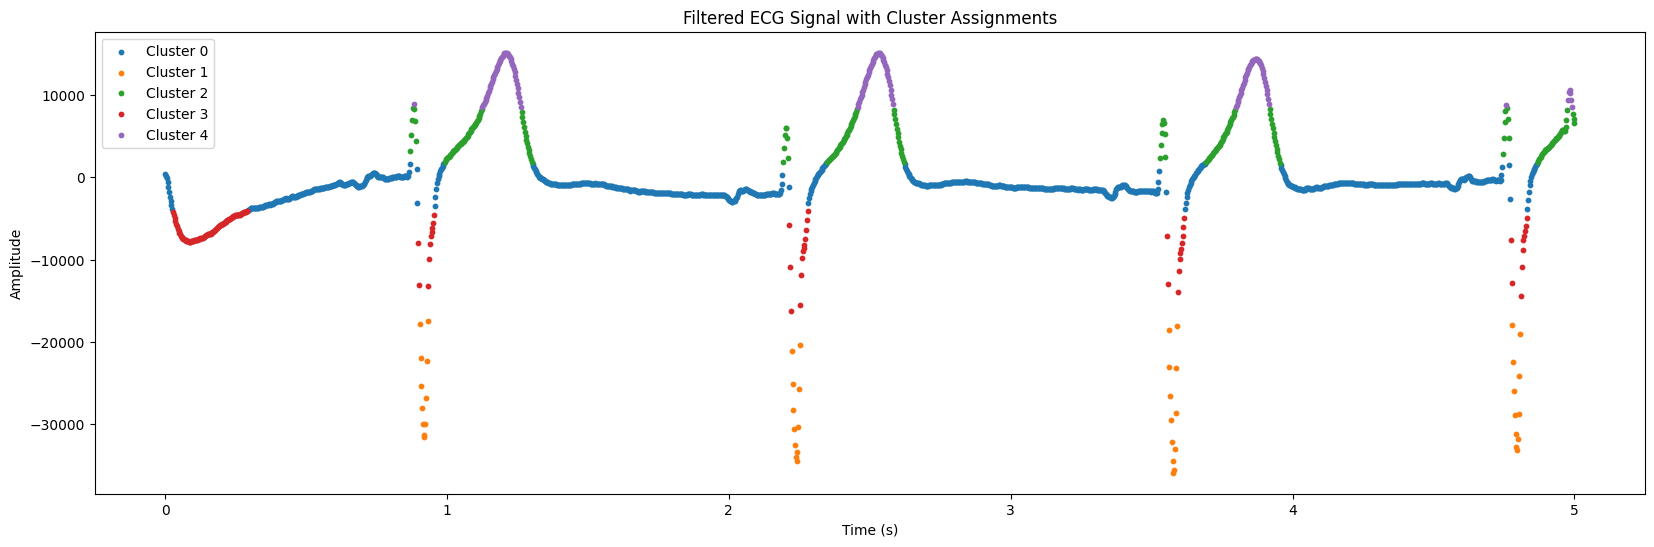

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Используем заглушки для ecg_data и time_array для демонстрации
fs = 360  # Частота дискретизации
ecg_data = np.cos(2 * np.pi * 1 * np.linspace(0, 5, 1800)) + np.random.normal(0, 0.2, 1800)
time_array = np.linspace(0, 5, 1800)  # Временной массив

# Определяем временной интервал для визуализации
start_time = 0  # Начало интервала в секундах
end_time = 5  # Конец интервала в секундах

# Определяем индексов для этого временного интервала
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Фильтрация
filtered_ecg_segment = filtered_ecg[start_index:end_index].reshape(-1, 1)
time_array_segment = time_array[start_index:end_index]

# Кластеризация
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(filtered_ecg_segment)
clusters = kmeans.predict(filtered_ecg_segment)

# Визуализация
plt.figure(figsize=(20, 6))
for i in range(n_clusters):
    cluster_points = time_array_segment[clusters == i]
    plt.scatter(cluster_points, filtered_ecg_segment[clusters == i].flatten(), label=f'Cluster {i}', s=10)
plt.title('Filtered ECG Signal with Cluster Assignments')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


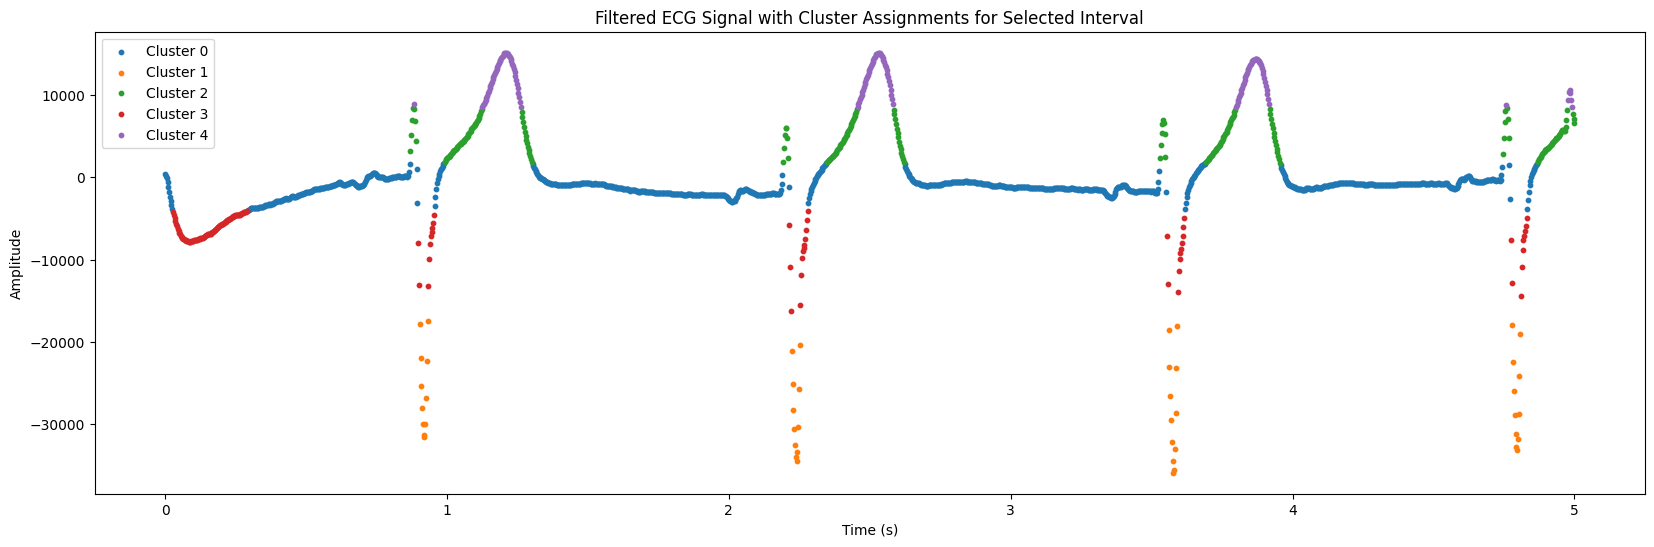

In [ ]:
# Ограничение filtered_ecg и time_array выбранным временным интервалом
filtered_ecg_segment = filtered_ecg[start_index:end_index]
time_array_segment = time_array[start_index:end_index]

# Подготовка данных для KMeans
X_segment = filtered_ecg_segment.reshape(-1, 1)

# Инициализация и выполнение KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_segment)
clusters_segment = kmeans.predict(X_segment)

# Визуализация отфильтрованного ЭКГ сигнала с назначениями кластеров для выбранного интервала
plt.figure(figsize=(20, 6))
for i in range(n_clusters):
    cluster_points = time_array_segment[clusters_segment == i]
    plt.scatter(cluster_points, filtered_ecg_segment[clusters_segment == i], label=f'Cluster {i}', s=10)
plt.title('Filtered ECG Signal with Cluster Assignments for Selected Interval')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

start_time = 0  # Начало интервала в секундах
end_time = 5  # Конец интервала в секундах

# Определение индексов
start_index = int(start_time * fs)
end_index = int(end_time * fs)

X = filtered_ecg.reshape(-1, 1)

n_clusters = 5

# Инициализируем KMeans с требуемым количеством кластеров и случайным состоянием для воспроизводимости
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans.fit(X)

# Предсказываем скопления
clusters = kmeans.predict(X)

# Построим график отфильтрованного сигнала ЭКГ с назначениями кластеров
plt.figure(figsize=(20, 6))
for i in range(n_clusters):
    cluster_points = time_array[clusters == i]
    plt.scatter(cluster_points, filtered_ecg[clusters == i], label=f'Cluster {i}', s=10)
plt.title('Filtered ECG Signal with Cluster Assignments')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1800 but corresponding boolean dimension is 25074

<Figure size 2000x600 with 0 Axes>

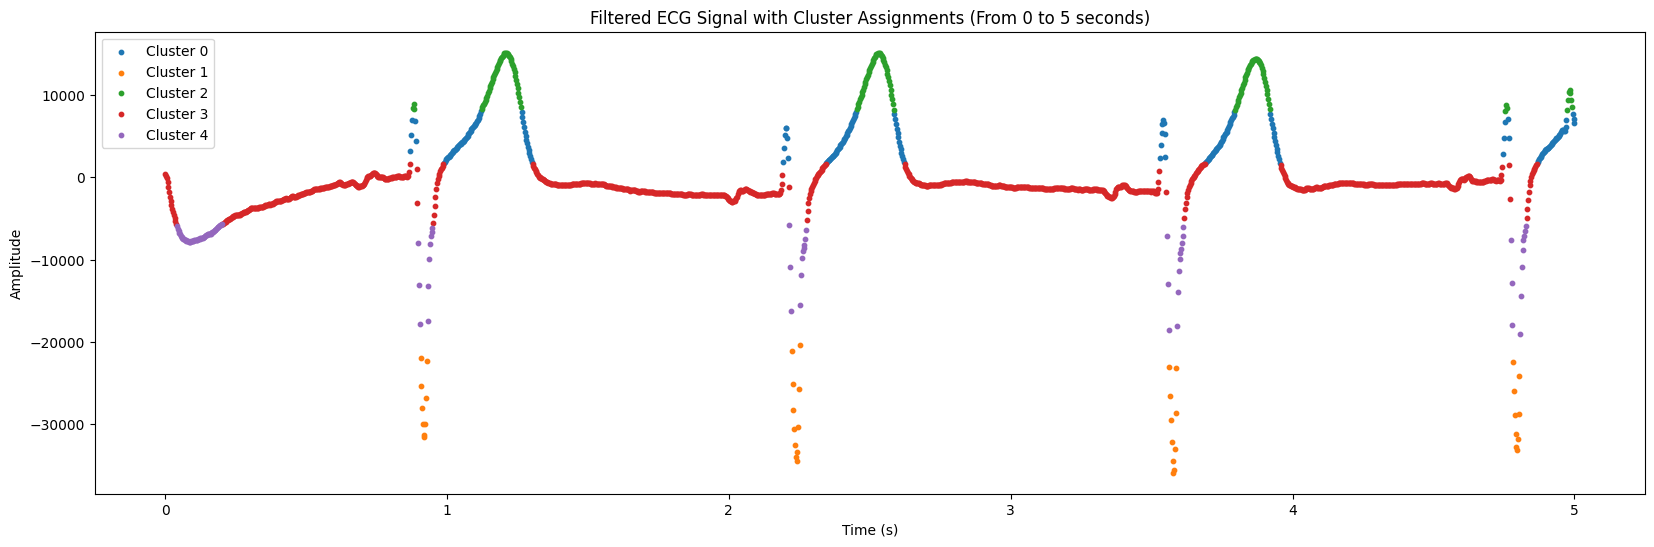

In [ ]:
# Визуализация отфильтрованного ЭКГ сигнала с кластерными присвоениями для определенного временного интервала
plt.figure(figsize=(20, 6))

# Ограничение временного массива и ЭКГ сигнала выбранным временным интервалом
time_array_part = time_array[start_index:end_index]
filtered_ecg_part = filtered_ecg[start_index:end_index]
clusters_part = clusters[start_index:end_index]

for i in range(n_clusters):
    # Отбор точек текущего кластера внутри заданного интервала
    cluster_points = time_array_part[clusters_part == i]
    plt.scatter(cluster_points, filtered_ecg_part[clusters_part == i], label=f'Cluster {i}', s=10)

plt.title(f'Filtered ECG Signal with Cluster Assignments (From {start_time} to {end_time} seconds)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

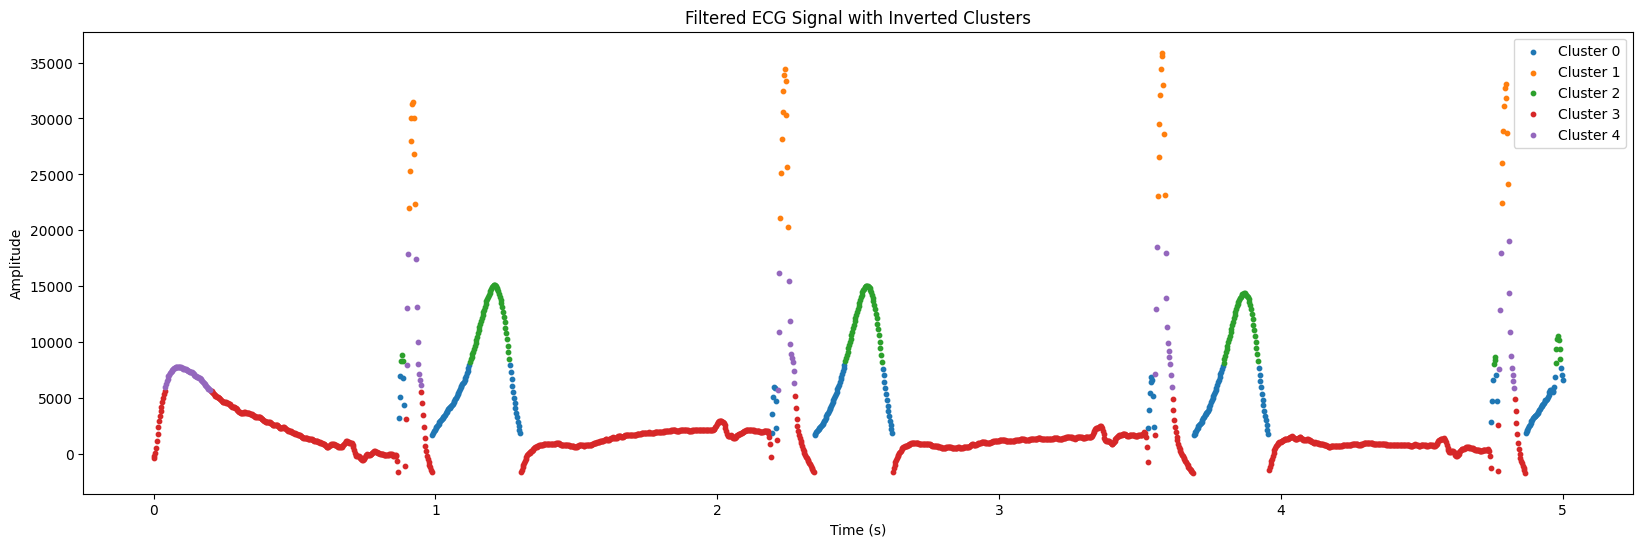

In [ ]:
# Инвертируем нужные кластеры
for cluster_to_invert in [1, 4, 3]:
    filtered_ecg[clusters == cluster_to_invert] *= -1

# Теперь восстонавливеам ЭКГ-сигнал с помощью инвертированных кластеров
plt.figure(figsize=(20, 6))

for i in range(n_clusters):
    # Отбор точек текущего кластера внутри заданного интервала
    cluster_points = time_array_part[clusters_part == i]
    plt.scatter(cluster_points, filtered_ecg_part[clusters_part == i], label=f'Cluster {i}', s=10)
plt.title('Filtered ECG Signal with Inverted Clusters')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

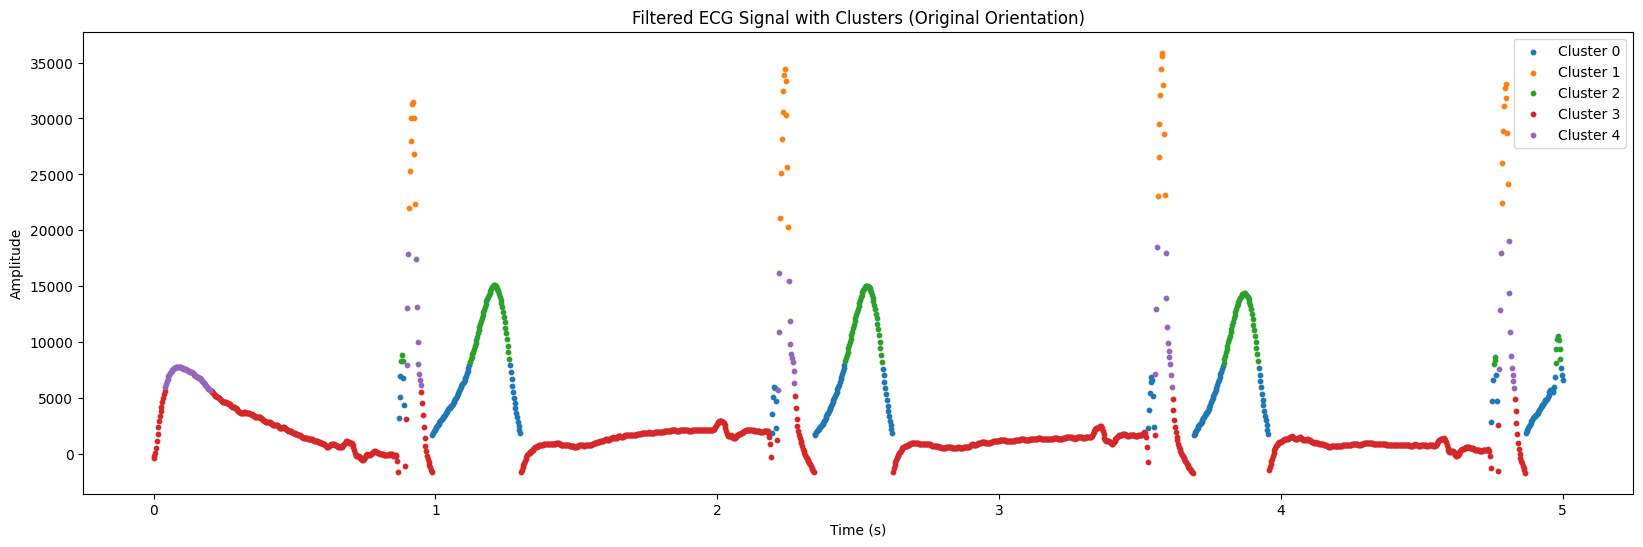

In [ ]:
# Вернемся к исходной отфильтрованной ЭКГ без каких-либо затрат
filtered_ecg_reverted = filtered_ecg.copy()

# Перестроем отфильтрованный ЭКГ-сигнал с исходной ориентацией и примененными кластерами
plt.figure(figsize=(20, 6))
for i in range(n_clusters):
    # Отбор точек текущего кластера внутри заданного интервала
    cluster_points = time_array_part[clusters_part == i]
    plt.scatter(cluster_points, filtered_ecg_part[clusters_part == i], label=f'Cluster {i}', s=10)
plt.title('Filtered ECG Signal with Clusters (Original Orientation)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
# Преобразование распределения точек по кластерам в таблицу
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Number of Points']
cluster_counts_df

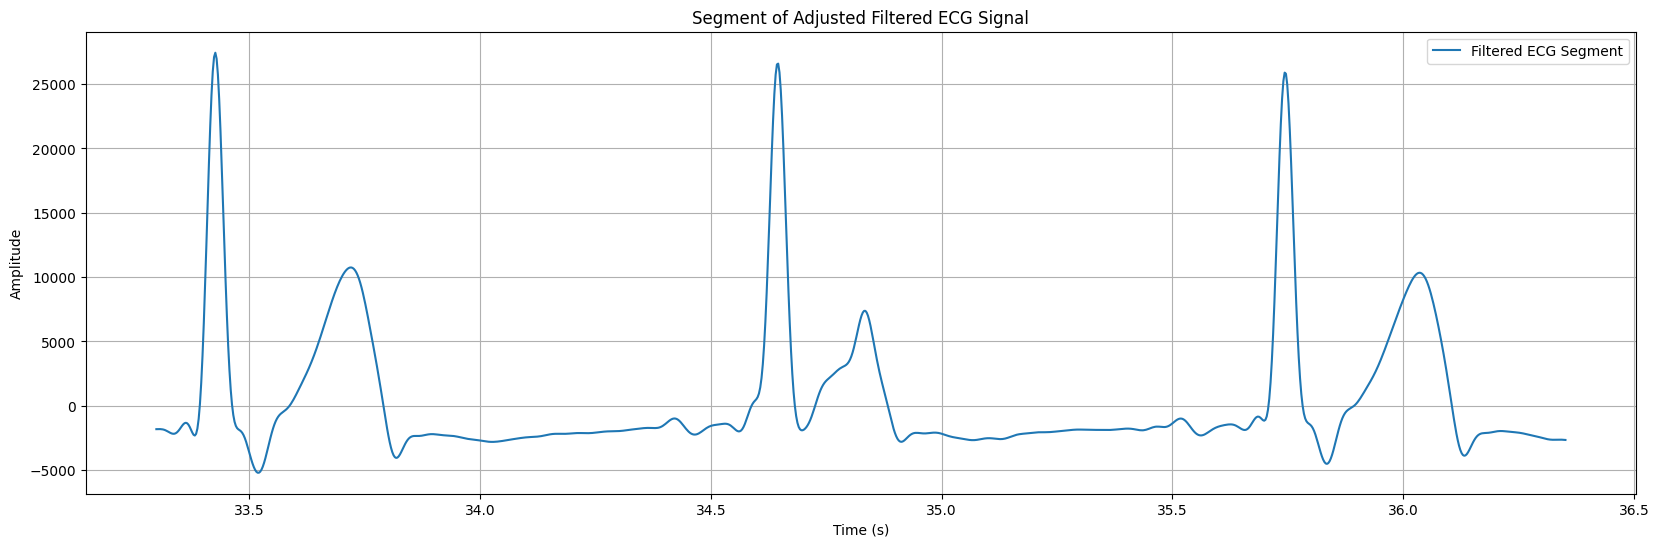

In [ ]:
# Повторно применяем полосовой фильтр с немного измененными параметрами для демонстрации
# Отрегулируем эти параметры
fs = 360  # Частота дискретизации остается такой же, как и раньше
lowcut_new = 0.5  # Немного более высокая нижняя граница, чтобы, возможно, уменьшить низкочастотный шум.
highcut_new = 20.0

# Применяем полосовой фильтр с измененными параметрами
filtered_ecg_adjusted = bandpass_filter(filtered_ecg_reverted, lowcut_new, highcut_new, fs, order=5)

if len(time_array) != len(filtered_ecg_adjusted):
    time_array = np.linspace(0, len(filtered_ecg_adjusted) / fs, len(filtered_ecg_adjusted))

# Теперь, когда длины массивов согласованы, мы можем безопасно выбрать сегмент для визуализации
plt.figure(figsize=(20, 6))
plt.plot(time_array[segment_start:segment_end], filtered_ecg_adjusted[segment_start:segment_end], label='Filtered ECG Segment')
plt.title('Segment of Adjusted Filtered ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

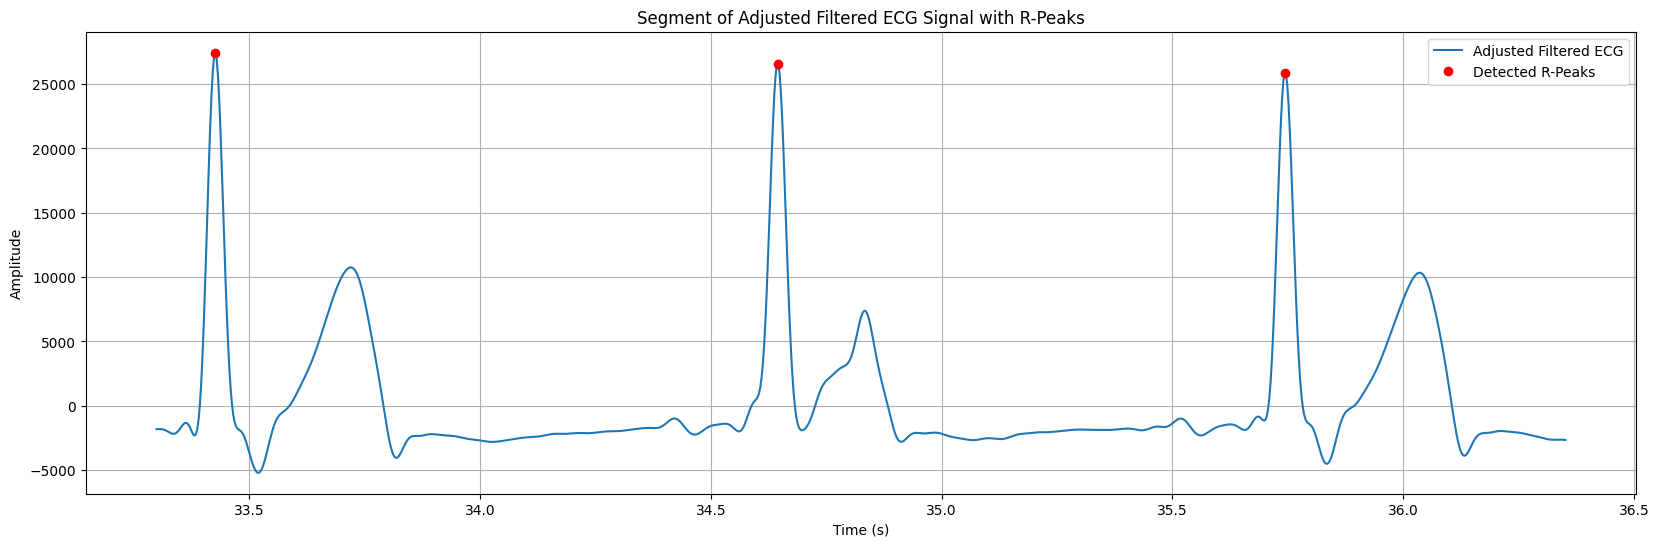

In [ ]:
# Находим R-пики в скорректированном отфильтрованном сигнале ЭКГ, используя тот же подход, что и раньше
peaks_adjusted, _ = find_peaks(filtered_ecg_adjusted, distance=fs*0.2, height=np.max(filtered_ecg_adjusted)*0.5)

# Построем график указанного сегмента скорректированного отфильтрованного ЭКГ-сигнала с отмеченными R-пиками.
plt.figure(figsize=(20, 6))
plt.plot(time_array[segment_start:segment_end], filtered_ecg_adjusted[segment_start:segment_end], label='Adjusted Filtered ECG')
plt.plot(time_array[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], filtered_ecg_adjusted[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], 'ro', label='Detected R-Peaks')
plt.title('Segment of Adjusted Filtered ECG Signal with R-Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

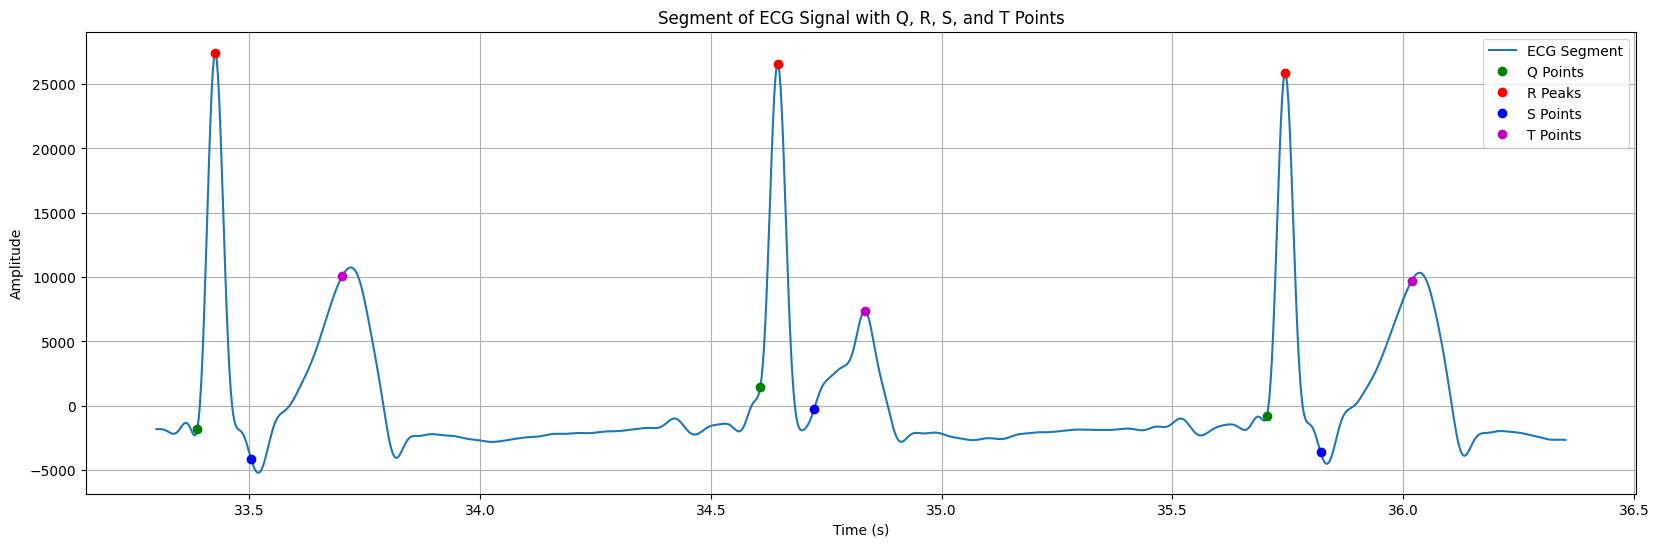

In [ ]:
# Определяем интервалы (в выборках) вокруг пиков R, чтобы оценить точки Q и S
q_interval = int(0.04 * fs)
s_interval = int(0.08 * fs)
t_interval = int(0.2 * fs)

# Инициализируем массивы для хранения индексов точек Q, S и T
q_points = []
s_points = []
t_points = []

for r in peaks_adjusted:
   # Оцениваем баллы Q и S на основе интервалов
    q_point = max(0, r - q_interval)
    s_point = min(len(filtered_ecg_adjusted) - 1, r + s_interval)
    q_points.append(q_point)
    s_points.append(s_point)

# Находим точку за точкой в пределах разумного диапазона
    t_search_range = filtered_ecg_adjusted[s_point:min(s_point + t_interval, len(filtered_ecg_adjusted))]
    if len(t_search_range) > 0:
        t_point_relative = np.argmax(t_search_range)
        t_point = s_point + t_point_relative
        t_points.append(t_point)

# Преобразовываем в массивы для упрощения индексации
q_points = np.array(q_points)
s_points = np.array(s_points)
t_points = np.array(t_points)

# Построем отрезок с отмеченными точками Q, R, S и T
plt.figure(figsize=(20, 6))
plt.plot(time_array[segment_start:segment_end], filtered_ecg_adjusted[segment_start:segment_end], label='ECG Segment')
plt.plot(time_array[q_points][(q_points >= segment_start) & (q_points < segment_end)], filtered_ecg_adjusted[q_points][(q_points >= segment_start) & (q_points < segment_end)], 'go', label='Q Points')
plt.plot(time_array[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], filtered_ecg_adjusted[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], 'ro', label='R Peaks')
plt.plot(time_array[s_points][(s_points >= segment_start) & (s_points < segment_end)], filtered_ecg_adjusted[s_points][(s_points >= segment_start) & (s_points < segment_end)], 'bo', label='S Points')
plt.plot(time_array[t_points][(t_points >= segment_start) & (t_points < segment_end)], filtered_ecg_adjusted[t_points][(t_points >= segment_start) & (t_points < segment_end)], 'mo', label='T Points')
plt.title('Segment of ECG Signal with Q, R, S, and T Points')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

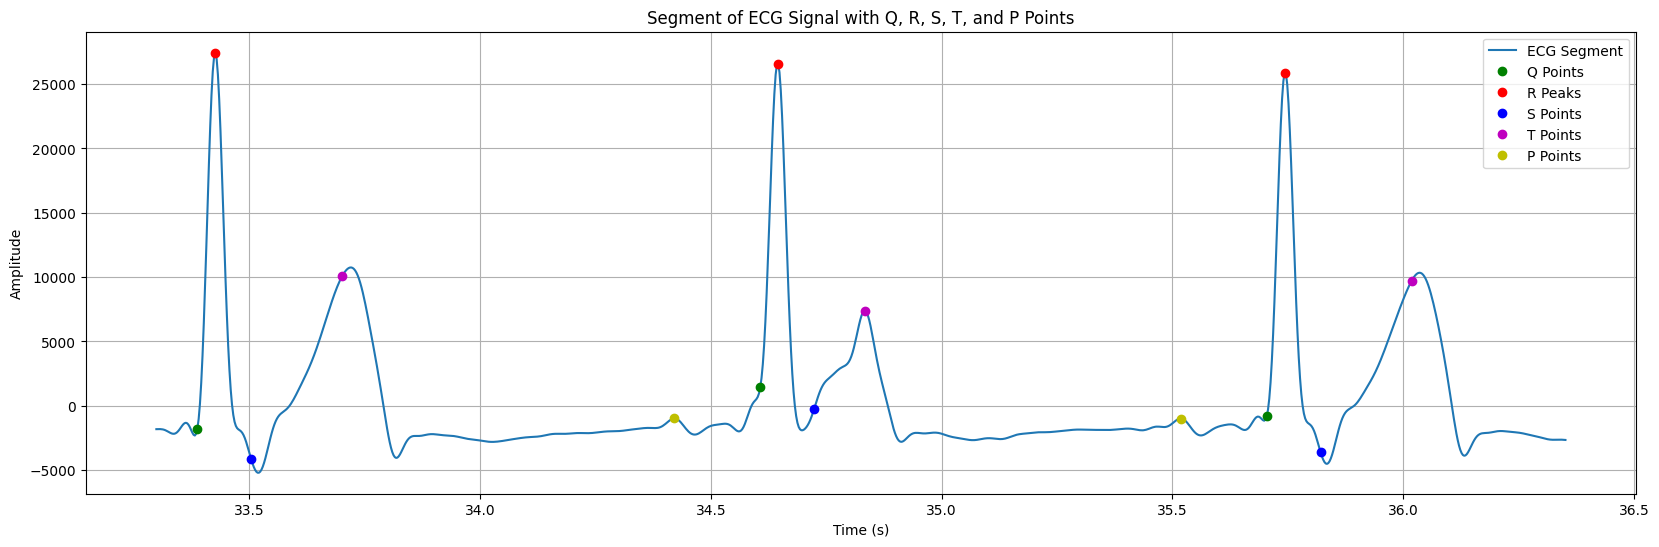

In [ ]:
# Определяем интервал поиска для P-волн до Q-точек.
p_interval_start = int(0.12 * fs)
p_interval_end = int(0.20 * fs)

# Инициализируем массив для хранения индексов P точек
p_points = []

for q in q_points:
   # Определяем диапазон поиска волны P, следя за тем, чтобы мы не выходили за пределы начала сигнала
    start_index = max(0, q - p_interval_end)
    end_index = max(0, q - p_interval_start)
    p_search_range = filtered_ecg_adjusted[start_index:end_index]

    if len(p_search_range) > 0:
        p_point_relative = np.argmax(p_search_range)
        p_point = start_index + p_point_relative
        p_points.append(p_point)
    else:
        p_points.append(-1)

# Преобразовываем в массив для упрощения индексации
p_points = np.array(p_points)

# Отфильтровываем недопустимые P-точки (заполнители)
valid_p_points = p_points[p_points >= 0]

# Построим график с отмеченными точками Q, R, S, T и P
plt.figure(figsize=(20, 6))
plt.plot(time_array[segment_start:segment_end], filtered_ecg_adjusted[segment_start:segment_end], label='ECG Segment')
plt.plot(time_array[q_points][(q_points >= segment_start) & (q_points < segment_end)], filtered_ecg_adjusted[q_points][(q_points >= segment_start) & (q_points < segment_end)], 'go', label='Q Points')
plt.plot(time_array[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], filtered_ecg_adjusted[peaks_adjusted][(peaks_adjusted >= segment_start) & (peaks_adjusted < segment_end)], 'ro', label='R Peaks')
plt.plot(time_array[s_points][(s_points >= segment_start) & (s_points < segment_end)], filtered_ecg_adjusted[s_points][(s_points >= segment_start) & (s_points < segment_end)], 'bo', label='S Points')
plt.plot(time_array[t_points][(t_points >= segment_start) & (t_points < segment_end)], filtered_ecg_adjusted[t_points][(t_points >= segment_start) & (t_points < segment_end)], 'mo', label='T Points')
plt.plot(time_array[valid_p_points][(valid_p_points >= segment_start) & (valid_p_points < segment_end)], filtered_ecg_adjusted[valid_p_points][(valid_p_points >= segment_start) & (valid_p_points < segment_end)], 'yo', label='P Points')
plt.title('Segment of ECG Signal with Q, R, S, T, and P Points')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Создаем DataFrame с результатами
results_df = pd.DataFrame({
    'Q_Points': q_points,
    'R_Peaks': peaks_adjusted,
    'S_Points': s_points,
    'T_Points': t_points,
    'P_Points': p_points  # Используйем raw p_points
})

# Удаление невалидных P точек перед сохранением
results_df = results_df[results_df['P_Points'] >= 0]

# Сохранение результатов в CSV файл
results_df.to_csv('/content/drive/MyDrive/ECG Data/ecg_analysis_results.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Загружаем раньше отмеченные с пиками сохраненные данные
df = pd.read_csv('/content/drive/MyDrive/ECG Data/ecg_analysis_results.csv')
df.head(10)

,Q_Points,R_Peaks,S_Points,T_Points,P_Points
0,316,330,358,429,248
1,791,805,833,904,724
2,1273,1287,1315,1386,1207
3,1712,1726,1754,1794,1645
4,2107,2121,2149,2220,2040
5,2582,2596,2624,2695,2515
6,3064,3078,3106,3177,2997
7,3503,3517,3545,3584,3436
8,3898,3912,3940,4011,3831
9,4373,4387,4415,4486,4306


In [ ]:
from sklearn.ensemble import IsolationForest

# Сначала настроем модели Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Обучение модели на данных ЭКГ
isolation_forest.fit(df)

# Предсказание аномалий (1 - нормальное, -1 - аномалия)
anomalies = isolation_forest.predict(df)

# Добавление результатов обнаружения аномалий к исходным данным
df['Anomaly'] = anomalies

# Отображение примеров аномальных и нормальных записей
anomalies_count = (anomalies == -1).sum()
normal_count = (anomalies == 1).sum()

df['Anomaly'].value_counts(), anomalies_count, normal_count

( 1    36
 -1    20
 Name: Anomaly, dtype: int64,
 20,
 36)

In [ ]:
# Фильтрация аномальных записей
anomalous_data = df[df['Anomaly'] == -1]

# Средние значения для аномальных записей
anomalous_means = anomalous_data.mean()

# Средние значения для нормальных записей
normal_data = df[df['Anomaly'] == 1]
normal_means = normal_data.mean()

# Сравнение средних значений аномальных и нормальных записей
comparison = pd.DataFrame({'Anomalous Means': anomalous_means, 'Normal Means': normal_means})

comparison

,Anomalous Means,Normal Means
Q_Points,11858.55,13112.250000
R_Peaks,11872.55,13126.250000
S_Points,11900.55,13154.250000
T_Points,11963.55,13217.444444
P_Points,11792.40,13045.250000
Anomaly,-1.00,1.000000


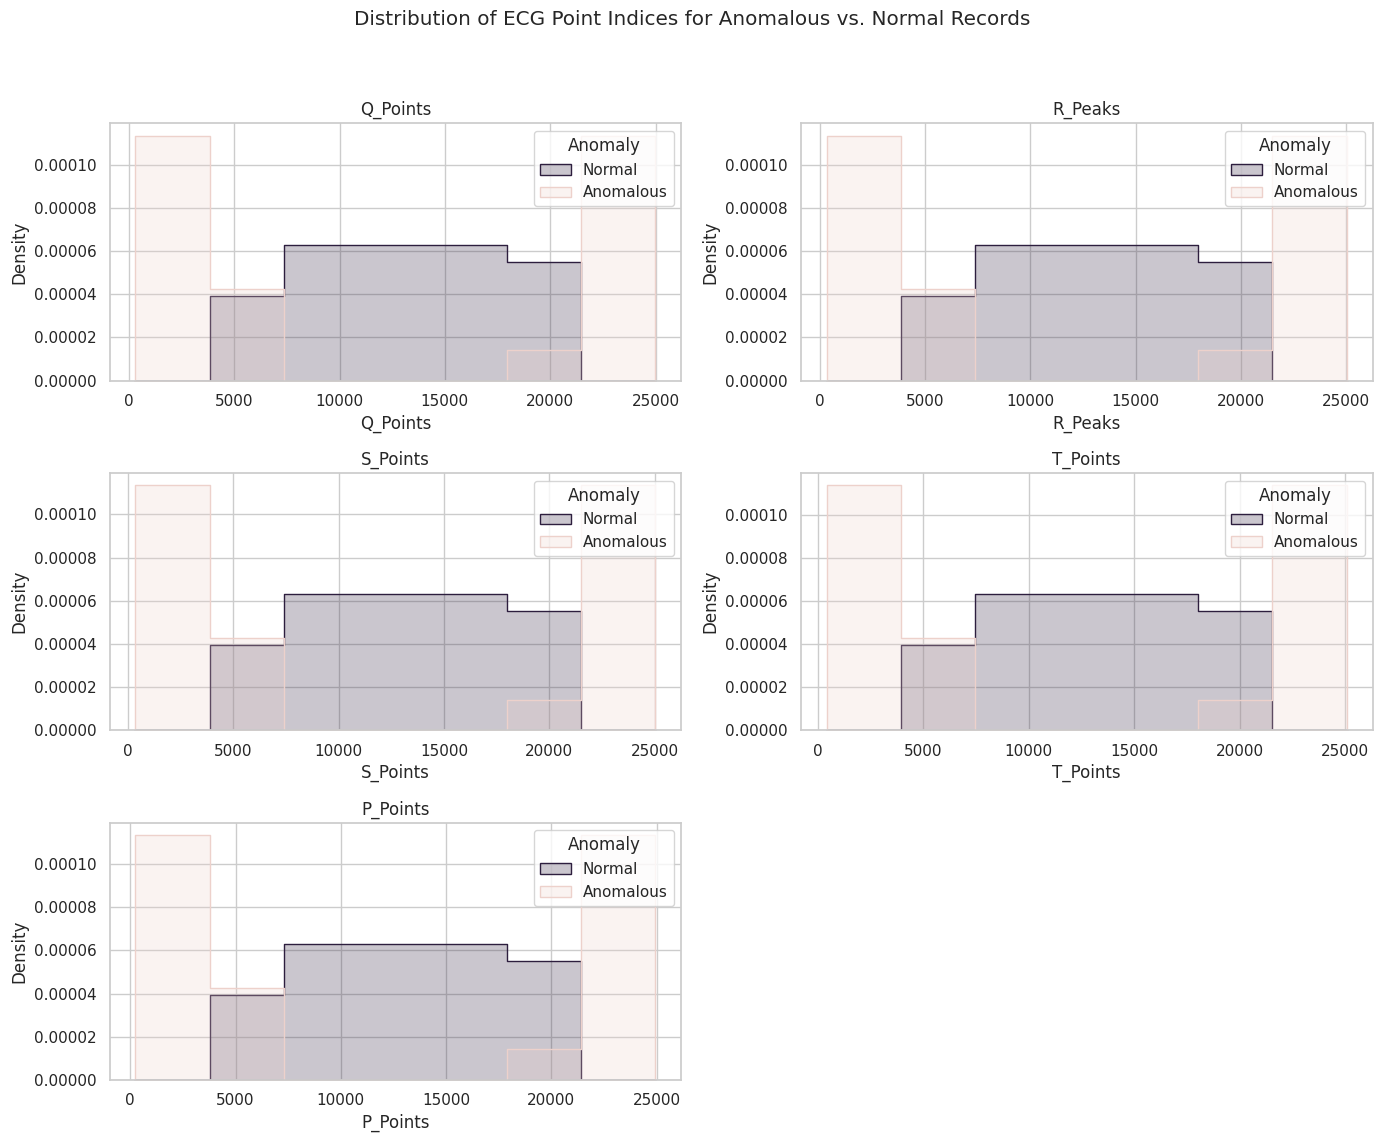

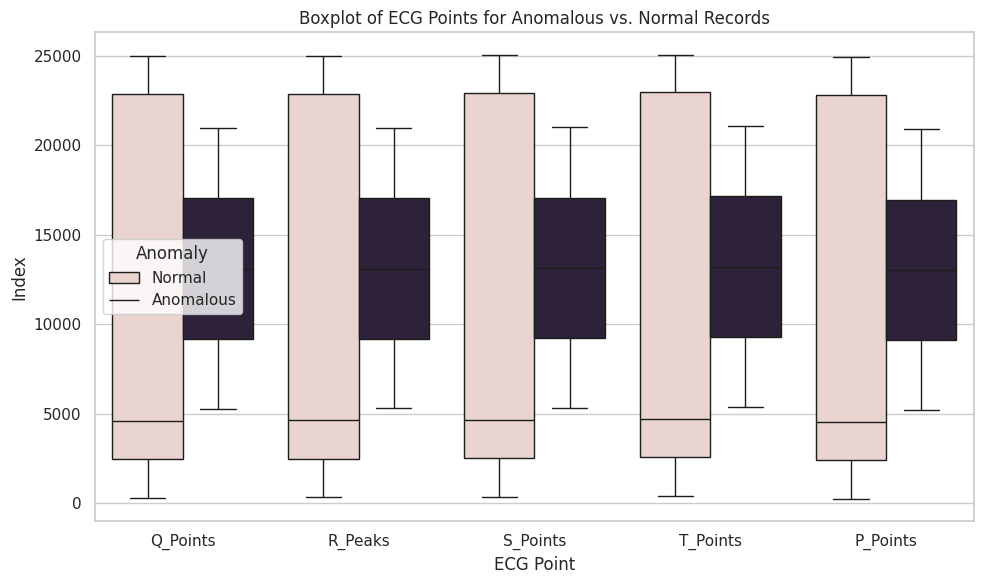

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")

# Создание гистограмм для каждого зубца
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Distribution of ECG Point Indices for Anomalous vs. Normal Records')

# Список точек для визуализации
points = ['Q_Points', 'R_Peaks', 'S_Points', 'T_Points', 'P_Points']

for ax, point in zip(axs.flat, points):
    sns.histplot(data=df, x=point, hue="Anomaly", element="step", stat="density", common_norm=False, ax=ax)
    ax.set_title(point)
    ax.legend(title='Anomaly', labels=['Normal', 'Anomalous'])

# Удаление пустого подграфика
fig.delaxes(axs[2,1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# создаем Boxplot для сравнения аномальных и нормальных записей
plt.figure(figsize=(10, 6))
plt.title('Boxplot of ECG Points for Anomalous vs. Normal Records')
sns.boxplot(data=df.melt(id_vars="Anomaly", value_vars=points, var_name="ECG Point", value_name="Index"),
            x="ECG Point", y="Index", hue="Anomaly")
plt.legend(title='Anomaly', labels=['Normal', 'Anomalous'])
plt.tight_layout()

plt.show()

<ipython-input-84-d7558cc0d101>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='coolwarm')


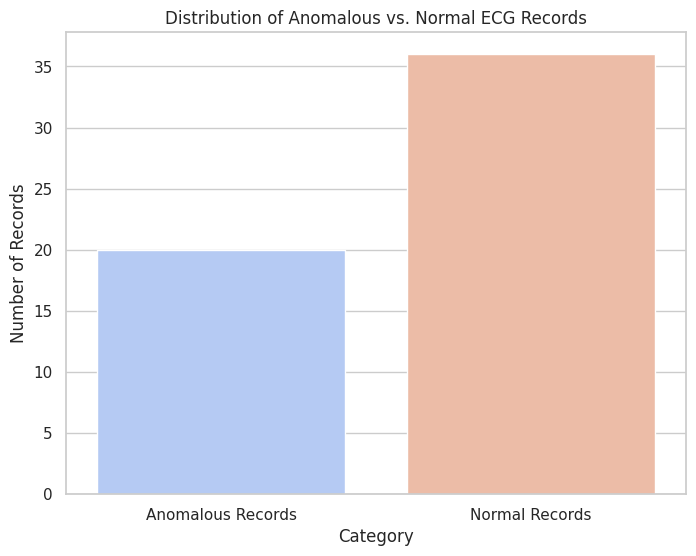

In [ ]:
# Подготовка данных для графика
anomaly_counts = {'Anomalous Records': 20, 'Normal Records': 36}
categories = list(anomaly_counts.keys())
counts = list(anomaly_counts.values())

# Создание графика
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette='coolwarm')
plt.title('Distribution of Anomalous vs. Normal ECG Records')
plt.ylabel('Number of Records')
plt.xlabel('Category')
plt.show()